Los datos que aparecen en la base de datos tiene unidades extrañas porque son numeros reales y no enteros lo cual no tiene mucha logica si lo que se cuenta son unidades discretas (alumnos). Para entender a qué hacen referencia esos datos, buscamos en la pagina https://data.educacion.gob.ar/aprender-respuestas-estudiante donde hay disponibles dashboard oficiales de los datos y filtramos Los datos del año 2022 por Secundaria 5/6to año, pregunta 2 obteniendo lo siguiente:
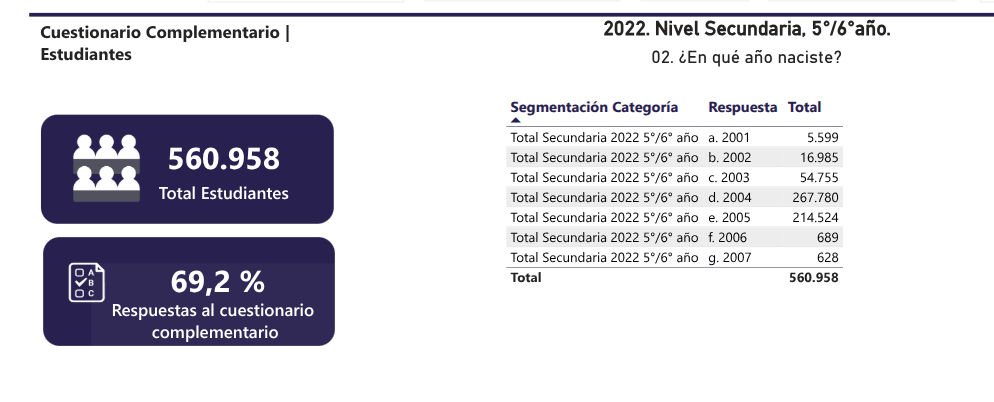
Fuente: https://data.educacion.gob.ar/aprender-respuestas-estudiante (Año 2022 - Secundaria - Pregunta 2)

Si lo comparamos por ejemplo, con la suma de la columna correspondiente a los que contestaron "2004" en el csv nos da 267779,7595 lo cual es consistente con considerar que el valor en el csv se refiere al numero de estudiantes y no a una expresion del tipo "miles de estudiantes" o "centenas de estudiantes".


Cargando base de datos no agrupada - año 2022

In [93]:
import pandas as pd
df = pd.read_csv('../data/raw/bases_usuarias_aprender_2022_secundariacensal_csv_0/Base Alumnos_AprenderSec_2022.csv',sep=';', decimal=",")

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403468 entries, 0 to 403467
Columns: 231 entries, jurisdiccion to region
dtypes: int64(6), object(225)
memory usage: 711.1+ MB


In [95]:
df.head()

,jurisdiccion,ID1,idseccion,idalumno,sector,ambito,ap01,ap02,ap03,ap04,...,mpuntaje,NSE_puntaje,NSE_nivel,edadA_junio2022,migracion,sobreedad,Nivel_Ed_Madre,Nivel_Ed_Padre,Nivel_Ed_Persona_Resp,region
0,90,36008003600800,1,655437,1,2,12,2,2,1,...,"437,40161","-,37244949",2,19,-9,3,2,2,,NOA
1,90,36008003600800,1,655438,1,2,1,5,2,1,...,,"-,71653908",1,17,2,1,2,5,,NOA
2,90,36008003600800,1,655439,1,2,1,5,2,1,...,"383,40466",,,17,2,1,4,,,NOA
3,90,36008003600800,1,655440,1,2,11,2,1,1,...,"401,40503",",12236121",2,19,-9,3,2,,,NOA
4,90,36008003600800,1,655441,1,2,6,3,1,1,...,,"-,65460205",1,19,-9,3,1,,,NOA


La columna jurisdiccion es el codigo de jurisdiccion. Voy a cambiarle el nombre a c_jurisdiccion

In [35]:
df = df.rename(columns={'jurisdiccion':'c_jurisdiccion'})

Importamos la base de datos de directores donde aparecen los nombres de las jurisdicciones junto a su codigo.

In [97]:
usecols = ["jurisdiccion", "c_jurisdiccion"]
#importo solo las dos primeras columnas.
df_dir = pd.read_csv('../data/raw/bases_usuarias_aprender_2022_secundariacensal_csv_0/Base Directivos_AprenderSec_2022.csv',usecols=usecols , sep=';', decimal=",",low_memory=False)

In [51]:
df_dir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11719 entries, 0 to 11718
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   jurisdiccion    11719 non-null  object
 1   c_jurisdiccion  11719 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 183.2+ KB


In [63]:
mapa_jurisdicciones = df_dir.drop_duplicates().set_index('c_jurisdiccion')['jurisdiccion']

In [66]:
mapa_jurisdicciones.info()

<class 'pandas.core.series.Series'>
Index: 24 entries, 90 to 58
Series name: jurisdiccion
Non-Null Count  Dtype 
--------------  ----- 
24 non-null     object
dtypes: object(1)
memory usage: 940.0+ bytes


In [67]:
df['jurisdiccion'] = df['c_jurisdiccion'].map(mapa_jurisdicciones)

In [92]:
df_bsas = df.loc[df['jurisdiccion'] == "Buenos Aires"]
ambito_rural = len(df_bsas.loc[df['ambito'] == 1])
ambito_urbano = len(df_bsas.loc[df['ambito'] == 2])
print("Ambito rural:",round(ambito_rural/len(df_bsas)*100,2),"%")
print("Ambito urbano:",round(ambito_urbano/len(df_bsas)*100,2),"%")

Ambito rural: 2.65 %
Ambito urbano: 97.35 %
